In [ ]:
!pip install matplotlib pandas py-raccoon

In [1]:
import py_raccoon as pr
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
G = nx.karate_club_graph()

In [3]:
log_counts, is_zero, sampled = pr.estimate_cycle_count(G, samples=1000)
sampled_counts = np.exp2(log_counts)
sampled_counts[is_zero] = 0

In [4]:
real_counts = np.zeros(sampled_counts.shape, dtype=np.int32)
for c in nx.simple_cycles(G):
    real_counts[len(c)] += 1

,estimation,correct
0,0,0
1,0,0
2,0,0
3,37,45
4,164,154
5,473,374
6,1670,969
7,5563,2746
8,16748,7507
9,39500,17625


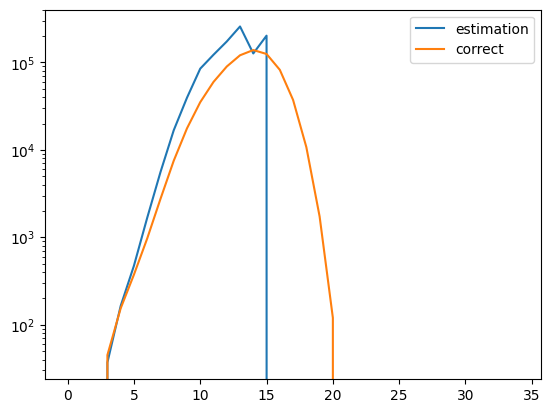

In [5]:
df = pd.DataFrame({'estimation': np.rint(sampled_counts).astype(np.int32), 'correct': real_counts})
df.plot(logy=True)
df